## Análise Exploratória de Dados

#### 1 - Importando os dados

Link do Dataset: [Jobs and Salaries in Data Science](https://www.kaggle.com/datasets/hummaamqaasim/jobs-in-data)

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import warnings
import seaborn as sns

warnings.filterwarnings('ignore')
pd.set_option('display.max_columns', 39)

In [2]:
arquivo = 'https://raw.githubusercontent.com/ryanrodr/eda-jobs-in-data/main/dados/jobs_in_data.csv'
df = pd.read_csv(arquivo)

In [3]:
print(f'{df.shape[0]} linhas e {df.shape[1]} colunas')

9355 linhas e 12 colunas


In [4]:
df.columns

Index(['work_year', 'job_title', 'job_category', 'salary_currency', 'salary',
       'salary_in_usd', 'employee_residence', 'experience_level',
       'employment_type', 'work_setting', 'company_location', 'company_size'],
      dtype='object')

#### 2 - Limpeza e preparação dos dados

- Identificando valores ausentes NaN (Not a Number) ou dados duplicados.

In [5]:
df.isna().sum()

work_year             0
job_title             0
job_category          0
salary_currency       0
salary                0
salary_in_usd         0
employee_residence    0
experience_level      0
employment_type       0
work_setting          0
company_location      0
company_size          0
dtype: int64

In [6]:
df.duplicated().sum()

4014

- Removendo dados duplicados e resetando o índice

In [7]:
df.drop_duplicates(inplace=True)

In [8]:
df.head(3)

,work_year,job_title,job_category,salary_currency,salary,salary_in_usd,employee_residence,experience_level,employment_type,work_setting,company_location,company_size
0,2023,Data DevOps Engineer,Data Engineering,EUR,88000,95012,Germany,Mid-level,Full-time,Hybrid,Germany,L
1,2023,Data Architect,Data Architecture and Modeling,USD,186000,186000,United States,Senior,Full-time,In-person,United States,M
2,2023,Data Architect,Data Architecture and Modeling,USD,81800,81800,United States,Senior,Full-time,In-person,United States,M


- Removendo colunas que não vão ser utilizadas

In [9]:
df.drop(columns=['salary_currency', 'salary', 'employee_residence', 'company_location'], inplace=True)

- Convertendo o tipo de dado das colunas

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5341 entries, 0 to 9354
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   work_year         5341 non-null   int64 
 1   job_title         5341 non-null   object
 2   job_category      5341 non-null   object
 3   salary_in_usd     5341 non-null   int64 
 4   experience_level  5341 non-null   object
 5   employment_type   5341 non-null   object
 6   work_setting      5341 non-null   object
 7   company_size      5341 non-null   object
dtypes: int64(2), object(6)
memory usage: 375.5+ KB


- Identificando as colunas categóricas que contenham menos de 10 valores únicos e contenham o tipo de dado 'object'

In [11]:
limite = 10

colunas_categoricas = [col for col in df.columns if df[col].nunique() <= limite and df[col].dtype == 'object']

In [12]:
colunas_categoricas

['job_category',
 'experience_level',
 'employment_type',
 'work_setting',
 'company_size']

- Alterando o tipo de dado para 'category'

In [13]:
df[colunas_categoricas] = df[colunas_categoricas].astype('category')

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5341 entries, 0 to 9354
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   work_year         5341 non-null   int64   
 1   job_title         5341 non-null   object  
 2   job_category      5341 non-null   category
 3   salary_in_usd     5341 non-null   int64   
 4   experience_level  5341 non-null   category
 5   employment_type   5341 non-null   category
 6   work_setting      5341 non-null   category
 7   company_size      5341 non-null   category
dtypes: category(5), int64(2), object(1)
memory usage: 194.0+ KB


#### 3 - Introdução e primeiros passos do projeto

In [15]:
df.head(3)

,work_year,job_title,job_category,salary_in_usd,experience_level,employment_type,work_setting,company_size
0,2023,Data DevOps Engineer,Data Engineering,95012,Mid-level,Full-time,Hybrid,L
1,2023,Data Architect,Data Architecture and Modeling,186000,Senior,Full-time,In-person,M
2,2023,Data Architect,Data Architecture and Modeling,81800,Senior,Full-time,In-person,M


- Criando uma visualizando da quantidade de vagas disponíveis por categoria

In [16]:
quantidade_categoria = df['job_category'].value_counts()
percentual_categoria = df['job_category'].value_counts(normalize=True) * 100

tabela_categoria = pd.DataFrame({'Quantidade': quantidade_categoria,
                                 'Porcentagem (%)': percentual_categoria})


tabela_categoria = tabela_categoria.reset_index().rename(columns={'index': 'Categoria'})

In [17]:
# Centralizando a visualização da tabela
tabela_categoria.style.set_properties(**{'text-align': 'center'})

,Categoria,Quantidade,Porcentagem (%)
0,Data Science and Research,1655,30.986707
1,Data Engineering,1160,21.718779
2,Machine Learning and AI,917,17.169069
3,Data Analysis,809,15.146976
4,Leadership and Management,351,6.571803
5,BI and Visualization,188,3.519940
6,Data Architecture and Modeling,162,3.033140
7,Data Management and Strategy,49,0.917431
8,Data Quality and Operations,45,0.842539
9,Cloud and Database,5,0.093615


- Criando uma tabela de distribuição de frequências com categoria e ano

In [18]:
# crosstab para criar uma tabela cruzada com duas variáveis
tabela_dist = pd.crosstab(index= df['job_category'],
                          columns= df['work_year'],
                          aggfunc= 'count',
                          values= df['job_category'])

# Renomeando o eixo das linhas e das colunas da tabela
tabela_dist = tabela_dist.rename_axis('Categoria').rename_axis('Ano de Pesquisa', axis='columns')

In [19]:
# Centralizando a visualização da tabela
tabela_dist.style.set_properties(**{'text-align': 'center'})

Ano de Pesquisa,2020,2021,2022,2023
Categoria,,,,
BI and Visualization,0,0,8,180
Cloud and Database,0,0,2,3
Data Analysis,15,28,185,581
Data Architecture and Modeling,0,5,30,127
Data Engineering,17,44,286,813
Data Management and Strategy,0,1,10,38
Data Quality and Operations,0,0,8,37
Data Science and Research,29,71,338,1217
Leadership and Management,0,9,71,271


- Criando uma visualização da quantidade de vagas por nível de experiência

In [20]:
quantidade_exp = df['experience_level'].value_counts()
percentual_exp = df['experience_level'].value_counts(normalize=True) * 100

tabela_exp = pd.DataFrame({'Quantidade': quantidade_exp, 'Porcentagem (%)': percentual_exp})
tabela_exp = tabela_exp.reset_index().rename(columns={'index': 'Experiência'})

In [21]:
# Centralizando a visualização da tabela
tabela_exp.style.set_properties(**{'text-align': 'center'})

,Experiência,Quantidade,Porcentagem (%)
0,Senior,3444,64.482307
1,Mid-level,1274,23.853211
2,Entry-level,400,7.489234
3,Executive,223,4.175248


- Exibindo os resultados em subplots com matplotlib

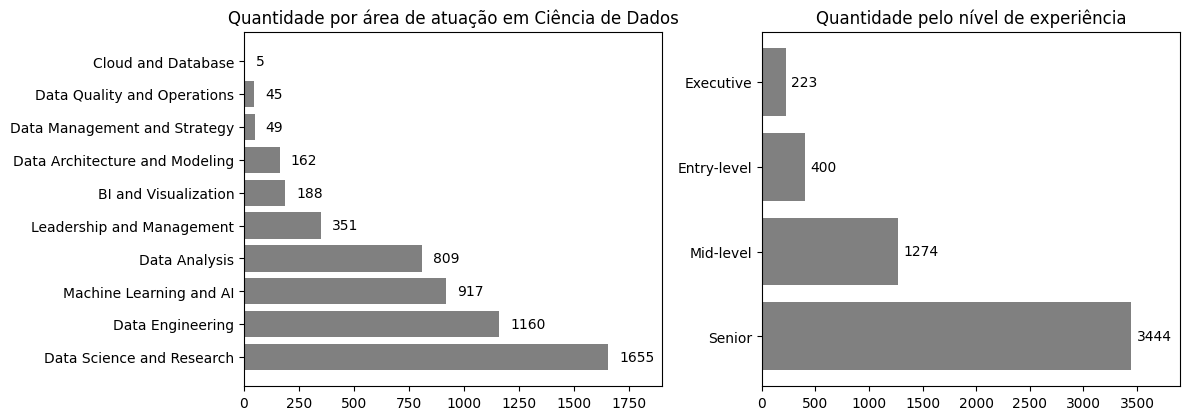

In [22]:
plt.figure(figsize=(12, 8)) # Definindo o tamanho da imagem

plt.subplot(2, 2, 1)
plt.barh(tabela_categoria['Categoria'], tabela_categoria['Quantidade'], color='grey')
for i, quantidade in enumerate(tabela_categoria['Quantidade']):
    plt.text(quantidade + 50, i, str(quantidade), va='center')
plt.title('Quantidade por área de atuação em Ciência de Dados')
plt.xlim(0, 1900)

plt.subplot(2, 2, 2)
plt.barh(tabela_exp['Experiência'], tabela_exp['Quantidade'], color='grey')
for i, quantidade in enumerate(tabela_exp['Quantidade']):
    plt.text(quantidade + 50, i, str(quantidade), va='center')
plt.title('Quantidade pelo nível de experiência')
plt.xlim(0, 3900)

plt.tight_layout() # Ajustando o tamanho

- Criando uma tabela de distribuição de frequências com categoria e nível de experiência

In [23]:
tabela_dist_exp = pd.crosstab(index=df['job_category'],
                 columns=df['experience_level'],
                 aggfunc='count',
                 values=df['job_category'])

tabela_dist_exp = tabela_dist_exp.rename_axis('Categoria').rename_axis('Experiência', axis='columns')

In [24]:
# Visualizando a tabela em um HeatMap
tabela_dist_exp.style.background_gradient(cmap='binary')

Experiência,Entry-level,Executive,Mid-level,Senior
Categoria,,,,
BI and Visualization,7,4,45,132
Cloud and Database,0,0,0,5
Data Analysis,111,16,241,441
Data Architecture and Modeling,0,2,27,133
Data Engineering,55,75,296,734
Data Management and Strategy,10,0,13,26
Data Quality and Operations,3,0,10,32
Data Science and Research,140,67,369,1079
Leadership and Management,10,46,72,223


In [25]:
# Somando os totais das linhas para transformar em percentual
soma_linhas = tabela_dist_exp.sum(axis=1)
categoria_exp = (tabela_dist_exp.div(soma_linhas, axis=0) * 100)

- Visualizando em percentual por cada categoria e seu nível de experiência exigido

In [26]:
# Visualizando a tabela em um HeatMap
categoria_exp.style.background_gradient(cmap='binary')

Experiência,Entry-level,Executive,Mid-level,Senior
Categoria,,,,
BI and Visualization,3.723404,2.127660,23.936170,70.212766
Cloud and Database,0.000000,0.000000,0.000000,100.000000
Data Analysis,13.720643,1.977750,29.789864,54.511743
Data Architecture and Modeling,0.000000,1.234568,16.666667,82.098765
Data Engineering,4.741379,6.465517,25.517241,63.275862
Data Management and Strategy,20.408163,0.000000,26.530612,53.061224
Data Quality and Operations,6.666667,0.000000,22.222222,71.111111
Data Science and Research,8.459215,4.048338,22.296073,65.196375
Leadership and Management,2.849003,13.105413,20.512821,63.532764


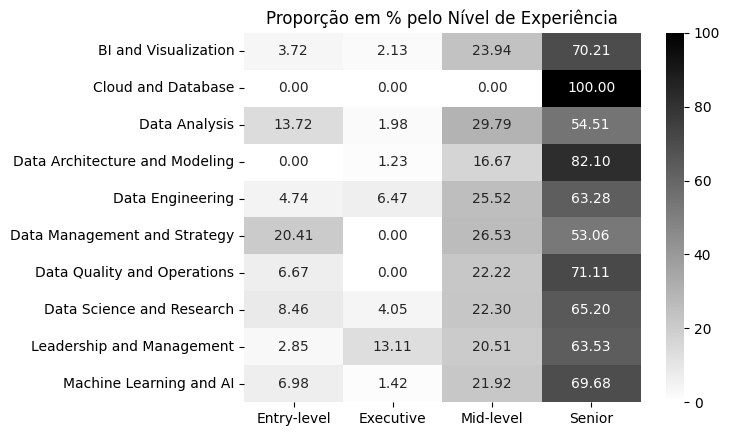

In [27]:
# Definindo um título para o HeatMap
plt.title('Proporção em % pelo Nível de Experiência')

# Utilizando o Seaborn para exibir os dados em % com duas casas decimais
ax = sns.heatmap(data=categoria_exp, annot=True, fmt='.2f', cmap='binary')

# Removendo a descrição do eixo x e y
ax.set_xlabel("")
ax.set_ylabel("");

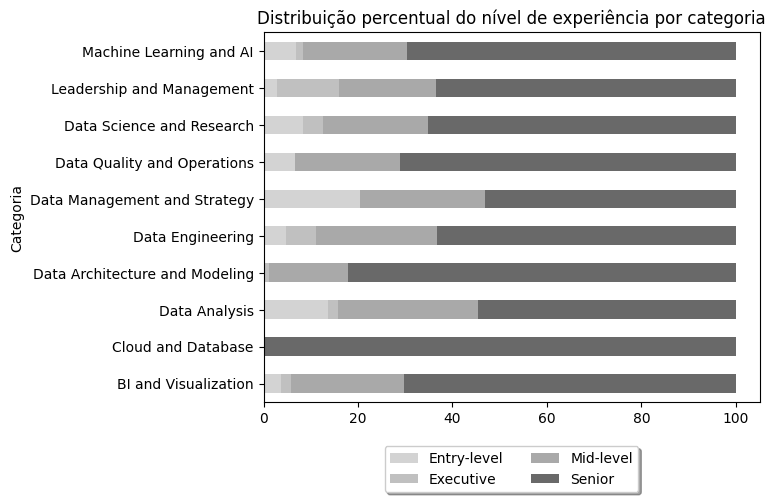

In [29]:
# Definindo as cores a serem usadas
cores = ['lightgray', 'silver', 'darkgray', 'dimgray']

categoria_exp.plot.barh(stacked=True, color=cores)
plt.title('Distribuição percentual do nível de experiência por categoria')
plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.1), fancybox=True, shadow=True, ncol=2)
plt.show()

- Quantidade de vagas e média salarial anual por categoria de trabalho em Data Science

In [30]:
# Agrupando os dados por categoria e realizando cálculos com agg
media_categoria = df.groupby(['job_category']).agg({'job_category': 'size', 'salary_in_usd': 'mean'})

# Renomando as colunas da tabela
media_categoria = media_categoria.rename(columns={'job_category': 'Quantidade', 'salary_in_usd': 'Média Anual'})

# Ordenando os dados pela médial salarial anual
media_categoria = media_categoria.sort_values(by='Média Anual', ascending=False)

In [31]:
# Centralizando e formatando a tabela
media_categoria.style.set_properties(**{'text-align': 'center'})

,Quantidade,Média Anual
job_category,,
Machine Learning and AI,917,170453.221374
Data Science and Research,1655,157131.039879
Data Architecture and Modeling,162,157054.006173
Cloud and Database,5,155000.000000
Leadership and Management,351,149020.108262
Data Engineering,1160,142967.543103
BI and Visualization,188,128377.734043
Data Management and Strategy,49,107655.836735
Data Analysis,809,106707.058096


In [32]:
# Agrupando os dados por titulo e realizando cálculos com agg
media_titulo = df.groupby(['job_title']).agg({'job_title': 'size', 'salary_in_usd': 'mean'})

# Renomando as colunas da tabela
media_titulo = media_titulo.rename(columns={'job_title': 'Quantidade', 'salary_in_usd': 'Média Anual'})

# Ordenando os dados pela médial salarial anual e quantidade
media_titulo = media_titulo.sort_values(by=['Média Anual', 'Quantidade'], ascending=[False, True])

- Top 10 vagas com a maior média salarial anual e mais vagas disponíveis

In [33]:
media_titulo.head(10)

,Quantidade,Média Anual
job_title,,
Analytics Engineering Manager,1,399880.000000
Data Science Tech Lead,1,375000.000000
Managing Director Data Science,1,300000.000000
Head of Machine Learning,2,259000.000000
AWS Data Architect,1,258000.000000
Cloud Data Architect,1,250000.000000
AI Architect,6,233656.000000
Director of Data Science,27,215447.629630
Machine Learning Software Engineer,13,212907.692308


In [34]:
tabela_experiencia = pd.crosstab(df['job_title'],
                                df['experience_level'],
                                aggfunc='mean',
                                values=df['salary_in_usd']).fillna(0)

In [35]:
# Centralizando e formatando a tabela
tabela_experiencia.style.set_properties(**{'text-align': 'center'})

experience_level,Entry-level,Executive,Mid-level,Senior
job_title,,,,
AI Architect,0.000000,215936.000000,0.000000,237200.000000
AI Developer,110119.500000,0.000000,138294.333333,162770.666667
AI Engineer,28296.500000,0.000000,163261.100000,192572.681818
AI Programmer,56021.750000,0.000000,0.000000,120000.000000
AI Research Engineer,30940.000000,0.000000,115603.000000,0.000000
AI Scientist,69483.200000,200000.000000,105588.250000,86195.250000
AWS Data Architect,0.000000,0.000000,258000.000000,0.000000
Analytics Engineer,102870.500000,185916.666667,133894.419355,156798.000000
Analytics Engineering Manager,0.000000,0.000000,0.000000,399880.000000
